<a href="https://colab.research.google.com/github/Apurva-tech/IET/blob/master/ML_task__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Dataset

In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/IET/ML_TASK_CSV.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Number of unique values for categorical data :

In [5]:
len(df["Geography"].unique())

3

In [6]:
len(df["Surname"].unique())

2932

In [7]:
len(df["Exited"].unique())

2

In [8]:
# Get unique count for each variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [9]:
# Drop the columns as explained above
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

# Data Analysis

In [10]:
print("Min age in dataset", min(df["Age"].unique()))
print("Max age in dataset", max(df["Age"].unique()))

Min age in dataset 18
Max age in dataset 92


In [11]:
print("Min NumOfProducts in dataset", min(df["NumOfProducts"].unique()))
print("Max NumOfProducts in dataset", max(df["NumOfProducts"].unique()))

Min NumOfProducts in dataset 1
Max NumOfProducts in dataset 4


In [12]:
print("Min CreditScore in dataset", min(df["CreditScore"].unique()))
print("Max CreditScore in dataset", max(df["CreditScore"].unique()))

Min CreditScore in dataset 350
Max CreditScore in dataset 850


In [13]:
print("Min Tenure in dataset", min(df["Tenure"].unique()))
print("Max Tenure in dataset", max(df["Tenure"].unique()))

Min Tenure in dataset 0
Max Tenure in dataset 10


In [14]:
print("Min Tenure in dataset", min(df["Exited"].unique()))
print("Max Tenure in dataset", max(df["Exited"].unique()))

Min Tenure in dataset 0
Max Tenure in dataset 1


In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
print("Shape of the dataset ",df.shape)

Shape of the dataset  (10000, 11)


In [17]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Imputing Data

In [18]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

The data is already imputed

In [19]:
df1 = df.copy()

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'CORRELATION')

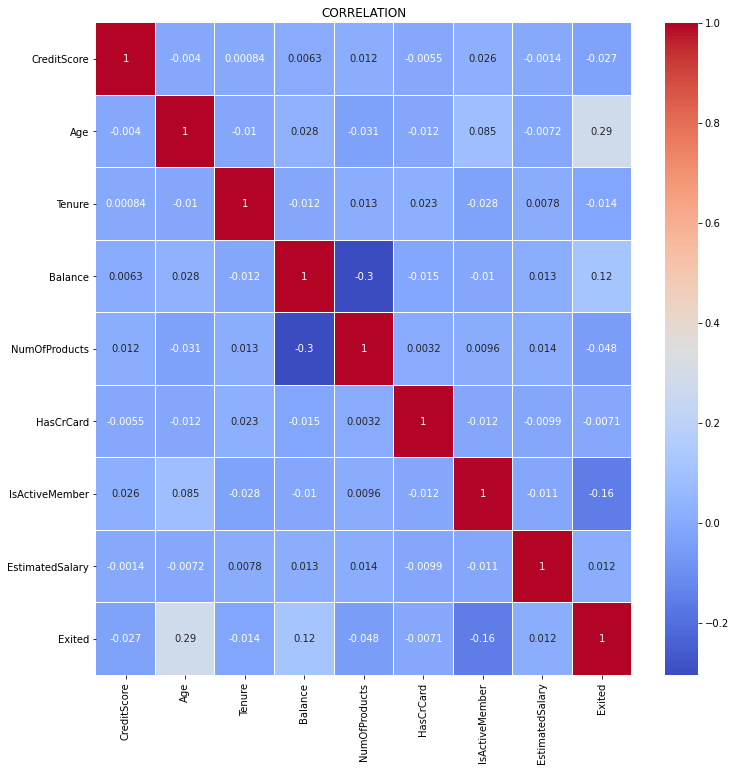

In [21]:
corr = df.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr  , linewidths= 0.01 , linecolor= "white" , cmap= "coolwarm" , annot = True).set_title("Correlation".upper())

# Data Visualisation  

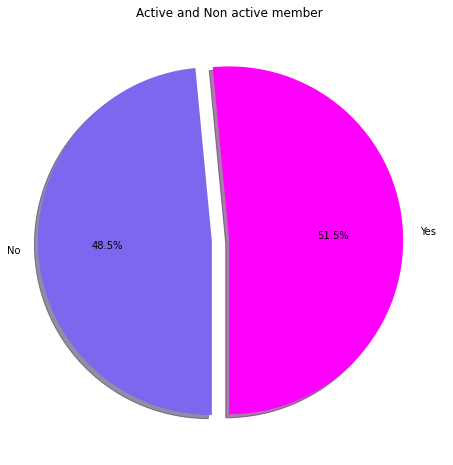

In [22]:
size  = df["IsActiveMember"].value_counts(sort =True)
colors = ["magenta","mediumslateblue"]
labels = ["Yes","No"]
explode = (0, 0.1)
plt.figure(figsize=(10 , 8))
plt.pie(size,colors=colors,autopct='%1.1f%%',shadow=True,startangle = 270 ,explode= explode, labels=labels)
plt.title("Active and Non active member")
plt.show()

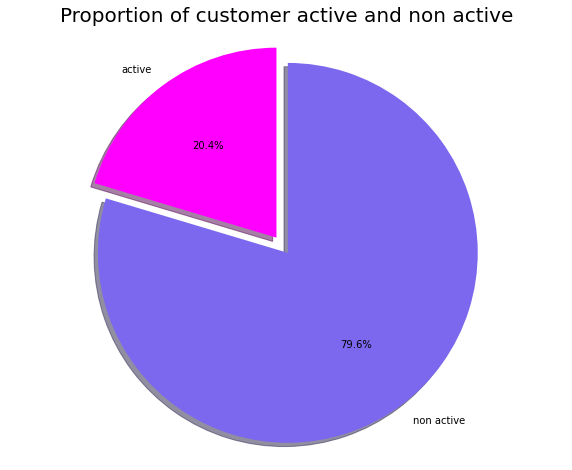

In [23]:
labels = 'active', 'non active' 
colors = ["magenta","mediumslateblue"]

sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90 , colors = colors)
ax1.axis('equal')
plt.title("Proportion of customer active and non active", size = 20)
plt.show()

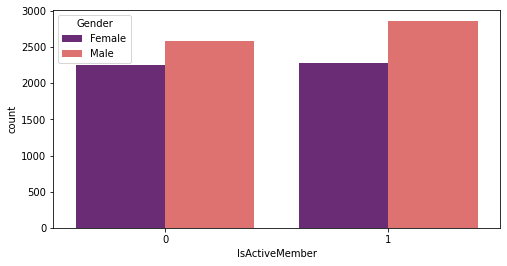

In [24]:
plt.figure(figsize=(8,4))
sns.countplot(x='IsActiveMember', data= df , palette= "magma",hue = "Gender")

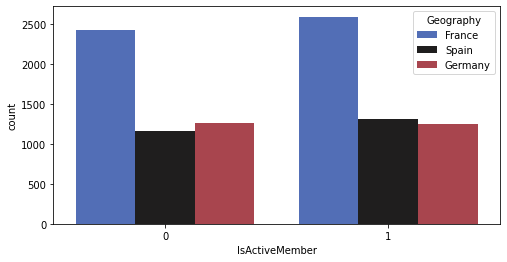

In [25]:
plt.figure(figsize=(8,4))
sns.countplot(x='IsActiveMember', data= df , palette= "icefire",hue = "Geography")

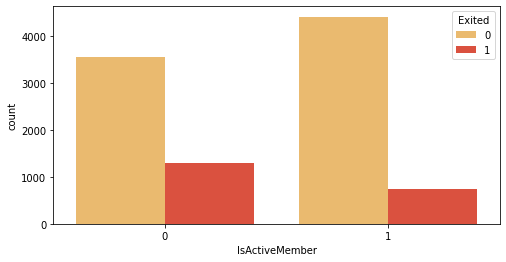

In [26]:
plt.figure(figsize=(8,4))
sns.countplot(x='IsActiveMember', data= df , palette= "YlOrRd",hue = "Exited")

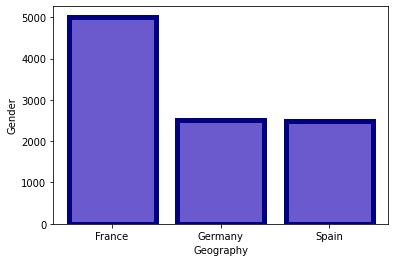

In [27]:
num_projects=df.groupby('Geography').count()
plt.bar(num_projects.index.values, num_projects['Gender'] , color = "slateblue" , edgecolor = "navy" ,linewidth = 5 )
plt.xlabel('Geography')
plt.ylabel('Gender')
plt.show()

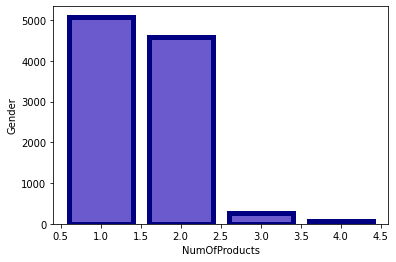

In [28]:
num_projects=df.groupby('NumOfProducts').count()
plt.bar(num_projects.index.values, num_projects['Gender'] , color = "slateblue" , edgecolor = "navy" ,linewidth = 5 )
plt.xlabel('NumOfProducts')
plt.ylabel('Gender')
plt.show()

# Treating the categorical Data

In [29]:
import numpy as np
bins = [ 0, 18, 24, 35, 60,92, 100]
labels = ["Unknown",'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
df["age"] = df["Age"]
df['AgeGroup'] = pd.cut(df["Age"], bins, labels = labels)
df["AgeGroup"].isnull().sum()

age_mapping = {"Unknown":0,'Teenager': 1, 'Student': 2, 'Young Adult': 3, 'Adult': 4, 'Senior': 5}
df["AgeGroup"].fillna(value = 'Unknown' ,inplace = True)


df['AgeGroup'] = df['AgeGroup'].map(age_mapping).astype("int")


In [30]:
print(df["AgeGroup"].unique())

[3 2 1 4 0]


In [31]:
label = {'France':1, 'Germany':2, 'Spain':3}
df.replace({'Geography':label}, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age,AgeGroup
0,619,1,Female,42,2,0.00,1,1,1,101348.88,1,42,3
1,608,3,Female,41,1,83807.86,1,0,1,112542.58,0,41,3
2,502,1,Female,42,8,159660.80,3,1,0,113931.57,1,42,3
3,699,1,Female,39,1,0.00,2,0,0,93826.63,0,39,3
4,850,3,Female,43,2,125510.82,1,1,1,79084.10,0,43,3


In [32]:
label = {'Female':0, 'Male':1}
df.replace({'Gender':label}, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age,AgeGroup
0,619,1,0,42,2,0.00,1,1,1,101348.88,1,42,3
1,608,3,0,41,1,83807.86,1,0,1,112542.58,0,41,3
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1,42,3
3,699,1,0,39,1,0.00,2,0,0,93826.63,0,39,3
4,850,3,0,43,2,125510.82,1,1,1,79084.10,0,43,3


# Feature Engineering

Adding new column BalanceSalaryRatio to scale data

(-1.0, 5.0)

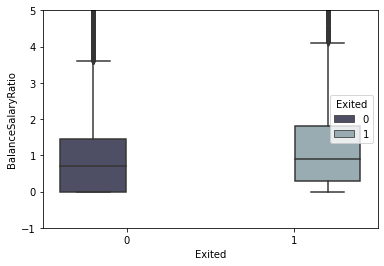

In [33]:
df['BalanceSalaryRatio'] = df.Balance/df.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df , palette= "bone")
plt.ylim(-1, 5)

Given that tenure is a 'function' of age, we introduce a variable aiming to standardize tenure over age:


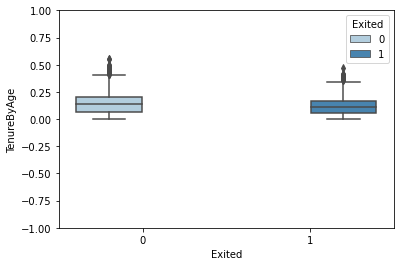

In [34]:
df['TenureByAge'] = df.Tenure/(df.age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df , palette = "Blues" )
plt.ylim(-1, 1)
plt.show()

Lastly we introduce a variable to capture credit score given age to take into account credit behaviour visavis adult life

In [35]:

df['CreditScoreGivenAge'] = df.CreditScore/(df.age)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age,AgeGroup,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,619,1,0,42,2,0.00,1,1,1,101348.88,1,42,3,0.000000,0.047619,14.738095
1,608,3,0,41,1,83807.86,1,0,1,112542.58,0,41,3,0.744677,0.024390,14.829268
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1,42,3,1.401375,0.190476,11.952381
3,699,1,0,39,1,0.00,2,0,0,93826.63,0,39,3,0.000000,0.025641,17.923077
4,850,3,0,43,2,125510.82,1,1,1,79084.10,0,43,3,1.587055,0.046512,19.767442


 Arrange columns by data type for easier manipulation

In [36]:

continuous_vars = ['CreditScore',  'AgeGroup', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
df = df[['Exited'] + continuous_vars + cat_vars]
df.head()

,Exited,CreditScore,AgeGroup,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
0,1,619,3,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,1,0
1,0,608,3,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,0,1,3,0
2,1,502,3,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,0,1,0
3,0,699,3,1,0.00,2,93826.63,0.000000,0.025641,17.923077,0,0,1,0
4,0,850,3,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,3,0


minMax scaling the continuous variables

In [37]:

minVec = df[continuous_vars].min().copy()
maxVec = df[continuous_vars].max().copy()
df[continuous_vars] = (df[continuous_vars]-minVec)/(maxVec-minVec)
df.head()

,Exited,CreditScore,AgeGroup,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
0,1,0.538,0.75,0.2,0.000000,0.000000,0.506735,0.000000,0.085714,0.235083,1,1,1,0
1,0,0.516,0.75,0.1,0.334031,0.000000,0.562709,0.000070,0.043902,0.237252,0,1,3,0
2,1,0.304,0.75,0.8,0.636357,0.666667,0.569654,0.000132,0.342857,0.168807,1,0,1,0
3,0,0.698,0.75,0.1,0.000000,0.333333,0.469120,0.000000,0.046154,0.310859,0,0,1,0
4,0,1.000,0.75,0.2,0.500246,0.000000,0.395400,0.000150,0.083721,0.354739,1,1,3,0


In [38]:
def DfPrepPipeline(df_predict,df_Cols,minVec,maxVec):
    # Add new features
    df_predict['BalanceSalaryRatio'] = df_predict.Balance/df_predict.EstimatedSalary
    df_predict['TenureByAge'] = df_predict.Tenure/(df_predict.Age - 18)
    df_predict['CreditScoreGivenAge'] = df_predict.CreditScore/(df_predict.Age - 18)
    # Reorder the columns
    continuous_vars = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
    cat_vars = ['HasCrCard','IsActiveMember',"Geography", "Gender"] 
    df_predict = df_predict[['Exited'] + continuous_vars + cat_vars]
    # Change the 0 in categorical variables to -1
    df_predict.loc[df_predict.HasCrCard == 0, 'HasCrCard'] = -1
    df_predict.loc[df_predict.IsActiveMember == 0, 'IsActiveMember'] = -1
    # One hot encode the categorical variables
    lst = ["Geography", "Gender"]
    remove = list()
    for i in lst:
        for j in df_predict[i].unique():
            df_predict[i+'_'+j] = np.where(df_predict[i] == j,1,-1)
        remove.append(i)
    df_predict = df_predict.drop(remove, axis=1)
    # Ensure that all one hot encoded variables that appear in the train data appear in the subsequent data
    L = list(set(df_Cols) - set(df_predict.columns))
    for l in L:
        df_predict[str(l)] = -1        
    # MinMax scaling coontinuous variables based on min and max from the train data
    df_predict[continuous_vars] = (df_predict[continuous_vars]-minVec)/(maxVec-minVec)
    # Ensure that The variables are ordered in the same way as was ordered in the train set
    df_predict = df_predict[df_Cols]
    return df_predict


# Splitting Data Into Test and Train sets ( 0.7 )

In [39]:
# Split Train, test data
df_train = df.sample(frac=0.7 ,random_state=200)
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))

7000
3000


In [40]:
df_test.head()

,Exited,CreditScore,AgeGroup,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
2,1,0.304,0.75,0.8,0.636357,0.666667,0.569654,0.000132,0.342857,0.168807,1,0,1,0
3,0,0.698,0.75,0.1,0.000000,0.333333,0.469120,0.000000,0.046154,0.310859,0,0,1,0
5,1,0.590,0.75,0.8,0.453394,0.333333,0.748797,0.000072,0.327273,0.233203,1,0,3,1
12,0,0.252,0.50,1.0,0.000000,0.333333,0.131260,0.000000,0.529412,0.217523,1,0,1,0
17,0,0.398,0.25,0.9,0.000000,0.333333,0.071981,0.000000,0.675000,0.428673,1,1,3,0


In [41]:
#Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [42]:
# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

# Logistic Regression Model 

In [43]:
log_primal = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=250, multi_class='auto',n_jobs=None, 
                                penalty='l2', random_state=None, solver='lbfgs',tol=1e-05, verbose=0, warm_start=False)
log_primal.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
print("Classification Report for Logistic Regression")
print(classification_report(df_test.Exited, log_primal.predict(df_test.loc[:, df_test.columns != 'Exited'])))

Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2405
           1       0.66      0.23      0.34       595

    accuracy                           0.82      3000
   macro avg       0.75      0.60      0.62      3000
weighted avg       0.80      0.82      0.79      3000



# Logistic regression with pol 2 kernel

In [44]:

poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'Exited'])
log_pol2 = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=300, multi_class='auto', n_jobs=None, 
                              penalty='l2', random_state=None, solver='liblinear',tol=0.0001, verbose=0, warm_start=False)
log_pol2.fit(df_train_pol2,df_train.Exited)
print("Classification Report for logistic regression with pol 2 kernel")

print(classification_report(df_train.Exited,  log_pol2.predict(df_train_pol2)))

Classification Report for logistic regression with pol 2 kernel
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      5558
           1       0.77      0.43      0.56      1442

    accuracy                           0.86      7000
   macro avg       0.82      0.70      0.74      7000
weighted avg       0.85      0.86      0.84      7000



# SVM with RBF Kernel

In [45]:

SVM_RBF = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True, 
              random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
print("Classification Report for SVM with RBF Kernel")

print(classification_report(df_train.Exited,  SVM_RBF.predict(df_train.loc[:, df_train.columns != 'Exited'])))

Classification Report for SVM with RBF Kernel
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      5558
           1       0.84      0.39      0.53      1442

    accuracy                           0.86      7000
   macro avg       0.85      0.69      0.73      7000
weighted avg       0.86      0.86      0.84      7000



# SVM with Pol Kernel

In [46]:

SVM_POL = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',  max_iter=-1,
              probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)
SVM_POL.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
print("Classification Report for SVM with Pol Kernel")

print(classification_report(df_train.Exited,  SVM_POL.predict(df_train.loc[:, df_train.columns != 'Exited'])))

Classification Report for SVM with Pol Kernel
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      5558
           1       0.88      0.29      0.44      1442

    accuracy                           0.85      7000
   macro avg       0.86      0.64      0.68      7000
weighted avg       0.85      0.85      0.81      7000



# Random Forest classifier

In [47]:

RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=6, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_impurity_split=None,min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
RF.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
print("Classification Report for Random Forest classifier")

print(classification_report(df_train.Exited,  RF.predict(df_train.loc[:, df_train.columns != 'Exited'])))

Classification Report for Random Forest classifier
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      5558
           1       0.89      0.44      0.59      1442

    accuracy                           0.87      7000
   macro avg       0.88      0.71      0.76      7000
weighted avg       0.87      0.87      0.86      7000



# Extreme Gradient Boost Classifier

In [48]:

XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.1, max_delta_step=0,max_depth=7,
                    min_child_weight=5, missing=None, n_estimators=20,n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0, 
                    reg_lambda=1, scale_pos_weight=1, seed=None, silent=True, subsample=1)
XGB.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
print("Classification Report for Extreme Gradient Boost Classifier")

print(classification_report(df_train.Exited,  XGB.predict(df_train.loc[:, df_train.columns != 'Exited'])))

Classification Report for Extreme Gradient Boost Classifier
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      5558
           1       0.85      0.48      0.61      1442

    accuracy                           0.87      7000
   macro avg       0.86      0.73      0.77      7000
weighted avg       0.87      0.87      0.86      7000



# Algorithm Comparision

In [51]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('Logistic Regression', log_primal))
#models.append(('Logistic Regression for pol 2 kernel', poly2))
models.append(('SVM for RBF kernel', SVM_RBF))
models.append(('SVM for POL kernel', SVM_POL))
models.append(('Random Forest Classifier', RF))
models.append(('XGB', XGB))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, df_train.loc[:, df_train.columns != 'Exited'], df_train.Exited , cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Logistic Regression: 0.821143 (0.007871)
SVM for RBF kernel: 0.853143 (0.013230)
SVM for POL kernel: 0.842857 (0.016074)
Random Forest Classifier: 0.850429 (0.010021)
XGB: 0.854714 (0.009711)


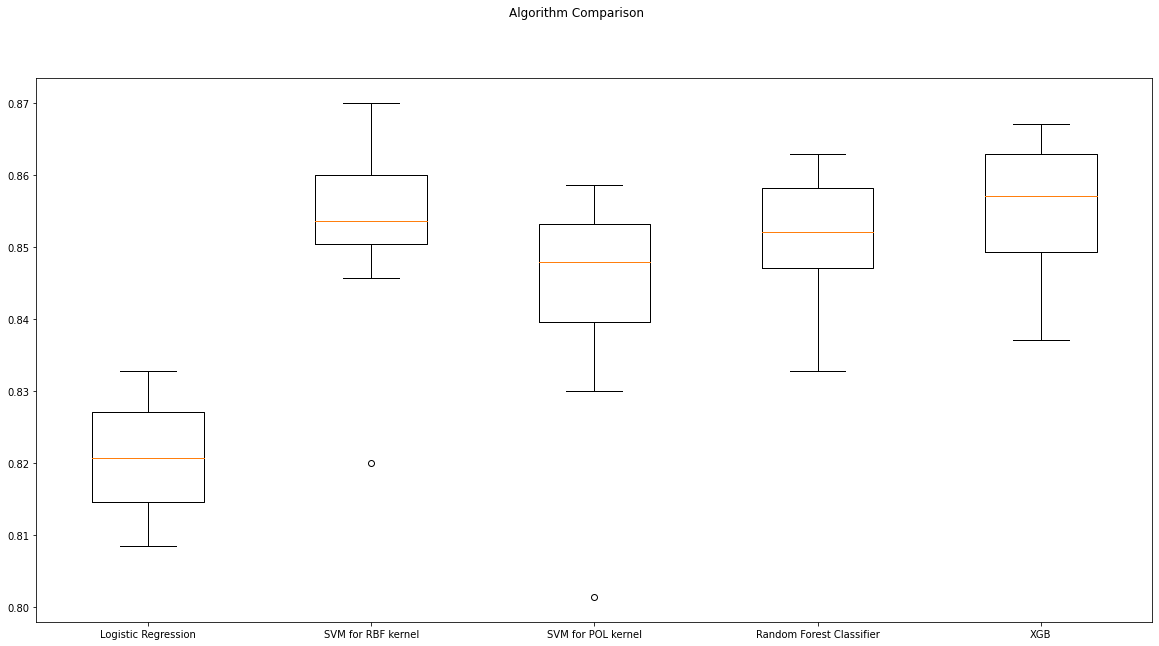

In [52]:
# boxplot algorithm comparison
fig = plt.figure(figsize =(20,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# The best Algorithm is Extreme Gradient Boost Classifier and Random forest classifier